# Background

## 🧠 What Is Object-Oriented Programming?

Object-Oriented Programming (OOP) is a programming paradigm that organizes software around **objects** rather than just functions and logic.

- Instead of writing standalone functions and variables, you create **objects** that represent real-world entities.

- Objects are defined by combining **data** (attributes or properties) and **behavior** (methods) into a single unit.

- Programs are built from these interacting objects, and **class definitions** serve as blueprints for creating object instances.

## 🌟 Advantages of Object-Oriented Programming (OOP)

### 1️⃣ **Modularity**
-  Code is organized into classes and objects, making it easier to manage and understand.
-  Each class acts as a self-contained module, simplifying debugging and testing.

### 2️⃣ **Reusability**
-  Classes can be reused across different parts of a program or in other projects.
-  Inheritance allows new classes to build on existing ones without rewriting code.

### 3️⃣ **Encapsulation**
-  Internal details of an object are hidden from the outside world.
-  This protects data and reduces the risk of unintended interference.

### 4️⃣ **Extensibility**
-  Existing code can be extended by adding new classes or modifying behavior through polymorphism.
-  Makes it easier to adapt software to changing requirements.

### 5️⃣ **Improved Problem Modeling**
-  OOP mirrors real-world thinking — objects with properties and behaviors.
-  Helps design systems that feel intuitive and natural.

### 6️⃣ **Maintainability**
-  Changes to one part of the system are less likely to affect others.
-  Cleaner separation of concerns leads to fewer bugs and easier updates.

# A simple OOP example

In [ ]:
from enum import Enum
from IPython.display import Image
from abc import abstractmethod


# Let's define some Enums first to represent Cat Colors
class CatColor(Enum):
    BLACK = "blaack"
    WHITE = "white"
    GRAY = "grey"
    ORANGE = "orange"
    BROWN = "Brown"
    SPOTTED = "spotted"
    TABBY = "tabby"


class Sex(Enum):
    MALE = "male"
    FEMALE = "female"


# Enums are good ...
# They provide clarity: Named constants are easier to understand than raw strings or numbers
# They prevent invalid values from being used.
# Some for of intelligence in IDes? -> IDEs and linters can help autocomplete and catch mistakes.

In [ ]:
# Now let's define a base class for animals


class Animal:
    def __init__(self, name: str, species: str, sex: Sex = None):
        """Lets define a constructor for the Animal class
        This can be used to instatiate an object of the class...

        IMPORTANT: The setters and getter are not defined here, but they could be...
        See later notes on getters and setters...
        The class definitions are intentionally left simple for clarity...

        Args:
            name (str): Az állat neve
            species (str): Az állat típusa
            sex (Sex): Az állat neme
        """
        self._name = name
        self._species = species  # we may want to revisit this later... (see next notebook)
        self._sex = sex
        print(f"Animal constructor call: {self._name}")

    def __str__(self):
        """magic method or dunder method"""
        return f"Name: {self._name} & Type: {self._species}"

    def makes_a_sound(self):
        print(f"{self._name} is making a sound typical of its species...")

In [23]:
# lets create an aninal instance...
captured_mouse = Animal(name="The mouse Lujzi cought", species="Mouse")
# lets check the instance
print(captured_mouse)
captured_mouse.makes_a_sound()

Animal constructor call: The mouse Lujzi cought
Name: The mouse Lujzi cought & Type: Mouse
The mouse Lujzi cought is making a sound typical of its species...


In [28]:
class Owner:
    def __init__(self, name: str, phone: str, address: str):
        """
        Basic data about the owner of the pet

        Args:
            name (str): the name of the owner
            phone (str): phone number
            address (str): the owner's address
        """
        self._name = name
        self._phone = phone
        self._address = address

    def __str__(self):
        return f"{self._name}, Phone: {self._phone}, Address: {self._address}"
    
    @property
    def name(self):
        return self._name

In [29]:
laci = Owner(name="Laci", phone="+363012345678", address="Budapest, Futrinka street 1.")
kriszti = Owner(
    name="Laci", phone="+363012345679", address="Budapest, Futrinka street 1."
)
neighbor = Owner(
    name="Neighbor", phone="+363012345680", address="Budapest, Futrinka street 2."
)
print(laci)

Laci, Phone: +363012345678, Address: Budapest, Futrinka street 1.


In [30]:
class Pet(Animal):
    def __init__(self, name: str, species: str, owner: Owner, sex: Sex = None):
        """
        The Pet class which inherits from Animal and has an owner instance

        Args:
            name (str): the animal's name
            species (str): the animals species
            owner (Owner): the owner of the pet
            sex (Sex): determines whether the pet is male or female
        """
        super().__init__(name, species, sex)  # Call the constructor of the base class
        self._owner = owner

    def __str__(self):
        return f"{super().__str__()} | Owner: {self._owner.name}"

    @abstractmethod
    def interact_with_owner(self):
        """Defines how this pet interacts with its owner."""
        pass

In [ ]:
# Finally lets define the Cat class which inherits from Pet


class Cat(Pet):

    def __init__(self, name: str, color: list[CatColor], owner: Owner, sex: Sex = None):
        """This is the constructor...
            The keyword `self` refers to the current instance of the class.
            The Cat class has a name, species type, colors, and an owner.
            All four attributes are provided at the instance level in the constructor.

            Args:
                name (str): The cat's name, inherited from Animal
                owner (Owner): The cat's owner
                color (list[CatColor]): The cat's colors
                sex (Sex): Male/Female
        """
        super().__init__(name, species="Cat", owner=owner, sex=sex)
        self._color = color

        # additional logic to determine whether the cat is male or female
        # yes we may introduce some additional logic inthe constructor to clean input data
        # We can frequently implement similar logics:
        # e.g.: default values, inference mechanisms, or data validation.
        if sex:
            self._sex = sex
        else:  # for stray cats we may not know
            self._sex = self.__infer_sex_from_color()

    def __infer_sex_from_color(self) -> Sex:
        if CatColor.ORANGE in self._color and len(self._color) == 1:
            # Orange cats are typically male
            return Sex.MALE
        elif len(self._color) >= 3:
            # Calico cats are almost always female
            return Sex.FEMALE
        elif CatColor.GRAY in self._color and CatColor.WHITE in self._color:
            # Gray and white cats are more likely to be female
            return Sex.FEMALE
        else:
            # Default assumption
            return Sex.MALE

    def makes_a_sound(self):
        """Public method — simulates the cat making a sound."""
        print(f"{self._name} meows!")

    def __str__(self):
        """String representation of the cat object."""
        return f"Name: {self._name} & Species: {self._species} & Owner: {self._owner}"

    def _allows_to_be_lifted(self):
        """Protected method — indicates the cat allows being lifted."""
        print(f"{self._name} allows being lifted!")

    def __goes_to_litter(self):
        """Private method — simulates the cat going to the litter box."""
        print(f"{self._name} goes to the litter box!")

    def get_colors(self):
        """
        Lists the cat's colors as a string.
        If the cat is red, black, and white, it may be identified as calico.
        """
        print("|".join([c.value for c in self._color]))

    def get_sex(self):
        """Prints the cat's biological sex."""
        print(self._sex.value)

    def interact_with_owner(self):
        print(f"{self._name} rubs against {self._owner.name}'s legs.")

In [41]:
# A konstruktor műküdése...
lujzi = Cat(
    name="Lujzi",
    color=[CatColor.BLACK, CatColor.ORANGE, CatColor.WHITE],
    owner=laci,
)
panni = Cat(
    name="Panni",
    color=[CatColor.GRAY, CatColor.TABBY, CatColor.WHITE],
    owner=kriszti,
    sex=Sex.FEMALE,
)
madarka = Animal(name="Az a madár amit Panni ejtett el tegnap,", species="sparrow")

Animal constructor call: Lujzi
Animal constructor call: Panni
Animal constructor call: Az a madár amit Panni ejtett el tegnap,


In [42]:
animals = [madarka, panni, lujzi, captured_mouse]

for animal in animals:
    print(str(animal))

print("\n Lets check the makes_a_sound method.")
for animal in animals:
    animal.makes_a_sound()

Name: Az a madár amit Panni ejtett el tegnap, & Type: sparrow
Name: Panni & Species: Cat & Owner: Laci, Phone: +363012345679, Address: Budapest, Futrinka street 1.
Name: Lujzi & Species: Cat & Owner: Laci, Phone: +363012345678, Address: Budapest, Futrinka street 1.
Name: The mouse Lujzi cought & Type: Mouse

 Lets check the makes_a_sound method.
Az a madár amit Panni ejtett el tegnap, is making a sound typical of its species...
Panni meows!
Lujzi meows!
The mouse Lujzi cought is making a sound typical of its species...


## The 4 Principles of Object-Oriented Programming (OOP)

### 🔒 Encapsulation

Encapsulation means hiding internal state and requiring all interaction to be performed through an object's methods.
Hence it is also about controlling access to data and behavior inside a class.
- Hiding internal state through protected and private methods/attributes
- Controlling access: Interaction with the object should happen through well-defined methods.
- Protecting integrity: By restricting direct access, encapsulation helps prevent unintended interference or misuse.

Explanation:
- makes_a_sound() is a public method.
- _allows_to_be_lifted() is protected — intended for internal or subclass use.
- __goes_to_litter() is private — not accessible from outside the class.

In [43]:
# Public method
lujzi.makes_a_sound()

# Protected method (by convention)
lujzi._allows_to_be_lifted()

# Private method (name mangling applies, not directly accessible)
# cat.__goes_to_litter()  # This would raise an error

Lujzi meows!
Lujzi allows being lifted!


In [44]:
# Somew notes about the private access modifiers in Python:
try:
    lujzi.__goes_to_litter()
except AttributeError as e:
    print(
        f" The '__' mehtods that are intended to be private are not directly accessible from outside the class."
        + f"\n {str(e)}"
    )

# However: the python name mangling feature allows access to private methods using a specific syntax
lujzi._Cat__goes_to_litter()

 The '__' mehtods that are intended to be private are not directly accessible from outside the class.
 'Cat' object has no attribute '__goes_to_litter'
Lujzi goes to the litter box!


### 🧬 Inheritance
Inheritance allows a class to inherit attributes and methods from another class.

Explanation:
- Cat inherits from Animal, gaining access to name, species, and makes_a_sound().
- The method makes_a_sound() is overridden to be cat-specific.


In [45]:
# Inherited attributes from Animal
print(lujzi._name)
print(lujzi._species)
lujzi.makes_a_sound()  # Overridden in Cat

Lujzi
Cat
Lujzi meows!


### 🔁 Polymorphism
Polymorphism allows methods to behave differently depending on the object calling them.

Explanation:
- Both Animal and Cat have a makes_a_sound() method.
- The behavior differs depending on the object type — this is method overriding.


In [46]:
captured_mouse.makes_a_sound()  # Output: Generic sound
lujzi.makes_a_sound()  # Output: Meow (specific to Cat)

The mouse Lujzi cought is making a sound typical of its species...
Lujzi meows!


### 🎭 Abstraction
Abstraction is the principle of hiding internal implementation details and exposing only the essential features of an object. 
It allows developers to work with high-level interfaces without needing to understand the complex logic underneath.


Formal
- interact_with_owner is an example of abstraction (via abstractmethods)
- @abstractmethod defines a contract that all subclasses must follow.
- it defines what the object does, not how it does it

Informal
- the method __infer_sex_from_color() encapsulates genetic logic.
- __infer_sex_from_color abstracted away — it's not part of the public interface.
- the user of the Cat class should not understand the logic behind the __infer_sex_from_color method


In [48]:
lajos = Cat(name="Lajos", color=[CatColor.ORANGE], owner=neighbor)
print(lajos)
print(lajos._sex)

Animal constructor call: Lajos
Name: Lajos & Species: Cat & Owner: Neighbor, Phone: +363012345680, Address: Budapest, Futrinka street 2.
Sex.MALE


### Note on abstraction...
__infer_sex_from_color is also an example for encapsulation. Basically the question there is, "who can access this method"...

__infer_sex_from_color is also a form of abstraction, as it basically raises a question: "Do the users need to know how this works internally"?

This kind of abstraction has no language support, it is basically a design choice.

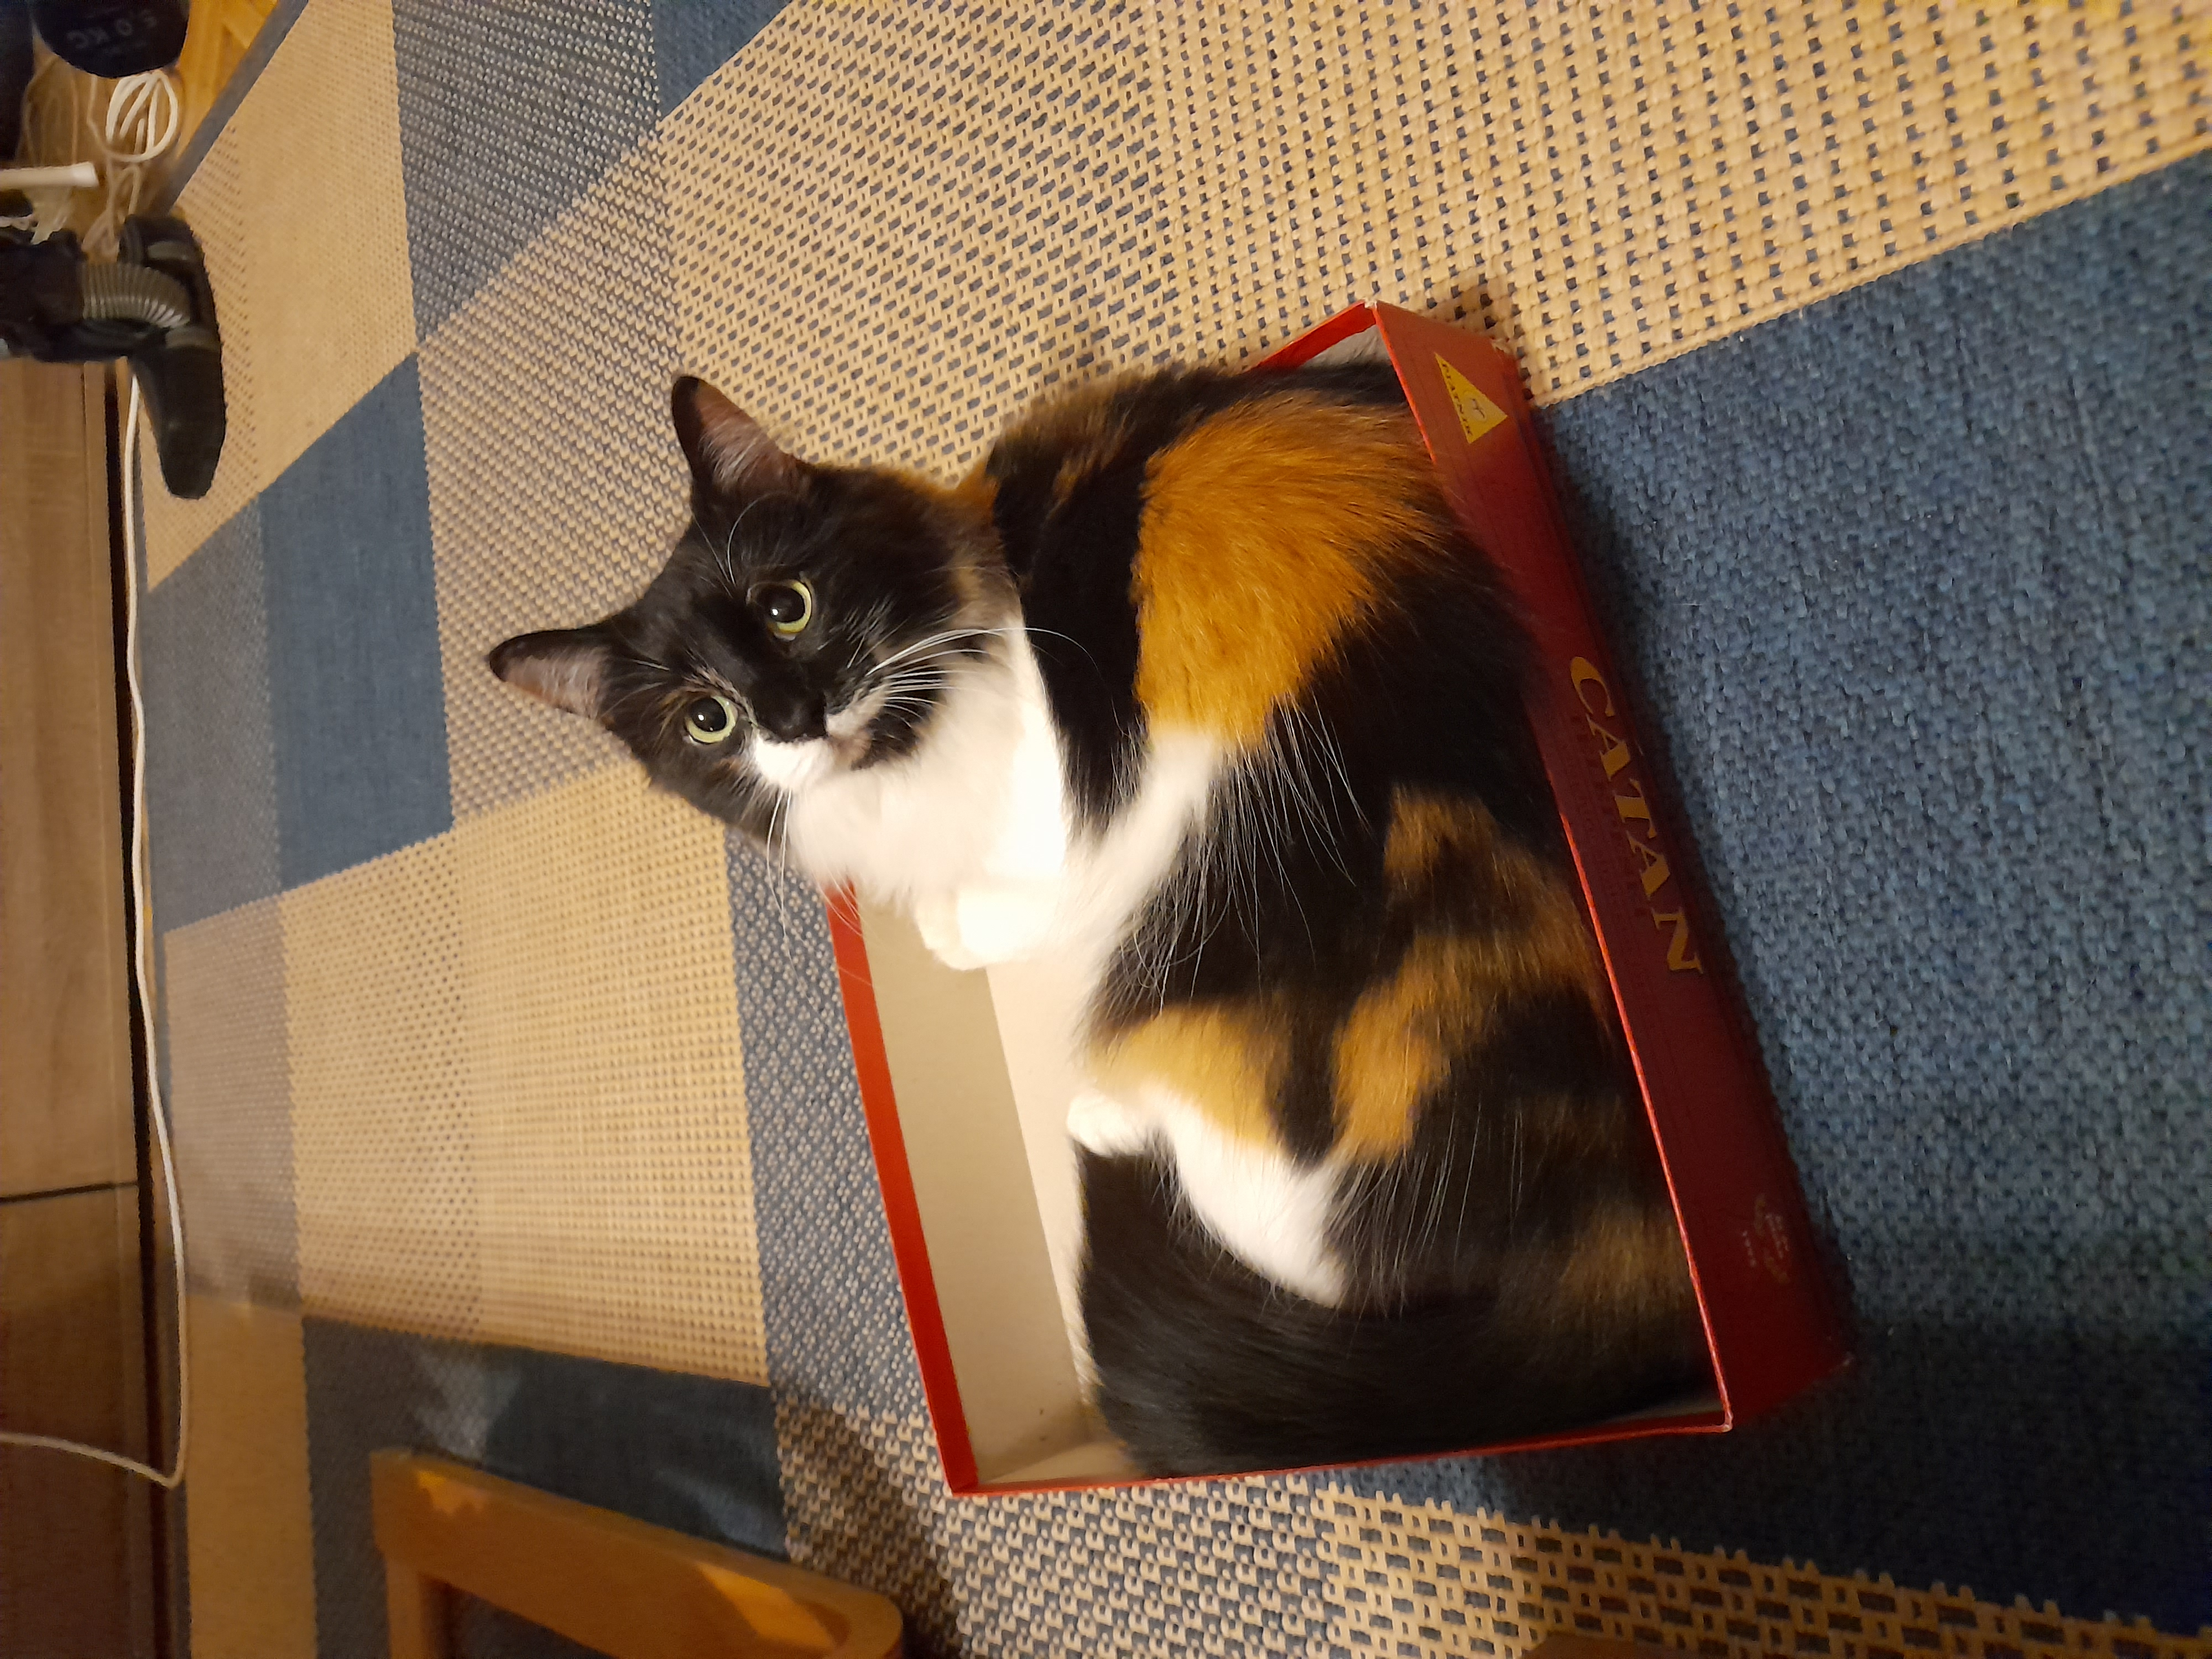

In [ ]:
Image(filename="resources/Lujzi.jpg", width=600)